In [1]:
!pip uninstall --yes networkx

Found existing installation: networkx 2.5.1
Uninstalling networkx-2.5.1:
  Successfully uninstalled networkx-2.5.1


In [2]:
!pip install networkx

  Using cached networkx-2.6.3-py3-none-any.whl (1.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
netcomp 0.2.3 requires networkx<2, but you have networkx 2.6.3 which is incompatible.
graphrole 1.0.2 requires networkx==2.5.1, but you have networkx 2.6.3 which is incompatible.


In [3]:
import csv #to read in network data

import networkx as nx #network analysis
import pandas as pd #data analysis library
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
#load the df
#via: http://www.thebaseballcube.com/mlb/people/coaches/byTeam.asp?T=20#
ym = pd.read_csv("https://raw.githubusercontent.com/pbarston/Yankees_Coaching_Tree/main/Yankees%20Managers%20Historical.csv",
           header = 0,
           index_col = 0,
           na_values = "---",
            sep = ",")
ym.head()

,Stats,Roster,Team Pages,Field Manager,Bench Coach,Hitting Coach,Pitching Coach,First Base Coach,Third Base Coach,Bullpen Coach
Year,,,,,,,,,,
2021,Stats,Roster,Franchise Page,Aaron Boone,Carlos Mendoza,"P.J. Pilittere, Marcus Thames",Matt Blake,Reggie Willits,Phil Nevin,Mike Harkey
2020,Stats,Roster,Franchise Page,Aaron Boone,Carlos Mendoza,"P.J. Pilittere, Marcus Thames",Matt Blake,Reggie Willits,Phil Nevin,Mike Harkey
2019,Stats,Roster,Franchise Page,Aaron Boone,Josh Bard,"P.J. Pilittere, Marcus Thames",Larry Rothschild,Reggie Willits,Phil Nevin,Mike Harkey
2018,Stats,Roster,Franchise Page,Aaron Boone,Josh Bard,"P.J. Pilittere, Marcus Thames",Larry Rothschild,Reggie Willits,Phil Nevin,Mike Harkey
2017,Stats,Roster,Franchise Page,Joe Girardi,Rob Thomson,"Alan Cockrell, Marcus Thames",Larry Rothschild,Tony Pena,Joe Espada,Mike Harkey


In [5]:
#make sure it's a df
print(type(ym))

<class 'pandas.core.frame.DataFrame'>


In [6]:
#drop the unecessary columns
ym = ym.drop(columns=['Stats', 'Roster','Team Pages'])

In [7]:
len(ym)

122

In [8]:
ym = ym.drop(index='Year')

In [9]:
len(ym)

121

In [10]:
ym

,Field Manager,Bench Coach,Hitting Coach,Pitching Coach,First Base Coach,Third Base Coach,Bullpen Coach
Year,,,,,,,
2021,Aaron Boone,Carlos Mendoza,"P.J. Pilittere, Marcus Thames",Matt Blake,Reggie Willits,Phil Nevin,Mike Harkey
2020,Aaron Boone,Carlos Mendoza,"P.J. Pilittere, Marcus Thames",Matt Blake,Reggie Willits,Phil Nevin,Mike Harkey
2019,Aaron Boone,Josh Bard,"P.J. Pilittere, Marcus Thames",Larry Rothschild,Reggie Willits,Phil Nevin,Mike Harkey
2018,Aaron Boone,Josh Bard,"P.J. Pilittere, Marcus Thames",Larry Rothschild,Reggie Willits,Phil Nevin,Mike Harkey
2017,Joe Girardi,Rob Thomson,"Alan Cockrell, Marcus Thames",Larry Rothschild,Tony Pena,Joe Espada,Mike Harkey
...,...,...,...,...,...,...,...
1905,Clark Griffith,NaN,NaN,NaN,NaN,NaN,NaN
1904,Clark Griffith,NaN,NaN,NaN,NaN,NaN,NaN
1903,Clark Griffith,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#drop any NA columns for manager
ym = ym[ym['Field Manager'].notna()]
len(ym)

119

In [12]:
#identify managers fired mid-year (not their staff)
ym2 = ym.loc[ym['Field Manager'].str.contains(",", case=False)]
len(ym2) #15 guys
ym2.head()

,Field Manager,Bench Coach,Hitting Coach,Pitching Coach,First Base Coach,Third Base Coach,Bullpen Coach
Year,,,,,,,
1990,"Bucky Dent, Stump Merrill",NaN,Darrell Evans,Bill Connors,Mike Ferraro,"Buck Showalter , Joe Sparks","Mark Connor, Gary Tuck"
1989,"Bucky Dent, Dallas Green",Charlie Fox,"Frank Howard, Champ Summers",Bill Connors,"Pat Corrales, Mike Ferraro","Lee Elia , Gene Michael",John Stearns
1988,"Billy Martin, Lou Piniella",George Mitterwald,Chris Chambliss,"Clyde King, Stan Williams",Mike Ferraro,"Clete Boyer , Gene Michael",Jeff Torborg
1985,"Yogi Berra, Billy Martin",NaN,Lou Piniella,"Mark Connor, Bill Monbouquette",Stump Merrill,Gene Michael,"Dom Scala, Dom Scala, Jeff Torborg"
1982,"Clyde King, Bob Lemon, Gene Michael",Joe Altobelli,Mickey Vernon,Stan Williams,Yogi Berra,Mike Ferraro,"Dom Scala, Jeff Torborg"


In [13]:
#remove the mid year guys
ym = ym.loc[~ym['Field Manager'].str.contains(",", case=False)]
len(ym)

104

In [14]:
#split any remaining column 

ym[['Hitting Coach 1','Hitting Coach 2']] =ym['Hitting Coach'].str.split(',', expand=True)
ym[['Pitching Coach 1','Pitching Coach 2']] =ym['Pitching Coach'].str.split(',', expand=True)
#note the first and third base coaches don't need splitting because there is never a record with shared duties
#that's why it throws an error

In [15]:
#test 1 - ensure works
ym.sample()

,Field Manager,Bench Coach,Hitting Coach,Pitching Coach,First Base Coach,Third Base Coach,Bullpen Coach,Hitting Coach 1,Hitting Coach 2,Pitching Coach 1,Pitching Coach 2
Year,,,,,,,,,,,
1949,Casey Stengel,NaN,NaN,NaN,NaN,Frankie Crosetti,NaN,NaN,NaN,NaN,NaN


In [16]:
ym[['Bullpen Coach 1','Bullpen Coach 2','Bullpen Coach 3']] =ym['Bullpen Coach'].str.split(',', expand=True)

In [17]:
#test 2 - ensure works
ym.sample()

,Field Manager,Bench Coach,Hitting Coach,Pitching Coach,First Base Coach,Third Base Coach,Bullpen Coach,Hitting Coach 1,Hitting Coach 2,Pitching Coach 1,Pitching Coach 2,Bullpen Coach 1,Bullpen Coach 2,Bullpen Coach 3
Year,,,,,,,,,,,,,,
2009,Joe Girardi,Tony Pena,Kevin Long,Dave Eiland,Mick Kelleher,Rob Thomson,Mike Harkey,Kevin Long,None,Dave Eiland,None,Mike Harkey,None,None


In [18]:
#make separate df for cleaned data (for safety)
#but create another one that drops initial HC PC BC columns (now we have that split out)
ym_old = ym
ym = ym.drop(columns=['Hitting Coach', 'Pitching Coach','Bullpen Coach'])

In [19]:
#does it work?
ym.sample()

,Field Manager,Bench Coach,First Base Coach,Third Base Coach,Hitting Coach 1,Hitting Coach 2,Pitching Coach 1,Pitching Coach 2,Bullpen Coach 1,Bullpen Coach 2,Bullpen Coach 3
Year,,,,,,,,,,,
1942,Joe McCarthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#How about the early years - lot of NAs?
ym.tail()

,Field Manager,Bench Coach,First Base Coach,Third Base Coach,Hitting Coach 1,Hitting Coach 2,Pitching Coach 1,Pitching Coach 2,Bullpen Coach 1,Bullpen Coach 2,Bullpen Coach 3
Year,,,,,,,,,,,
1907,Clark Griffith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1906,Clark Griffith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1905,Clark Griffith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1904,Clark Griffith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,Clark Griffith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#replace "none" with NA
ym = ym.fillna(value=np.nan)
ym.head()

,Field Manager,Bench Coach,First Base Coach,Third Base Coach,Hitting Coach 1,Hitting Coach 2,Pitching Coach 1,Pitching Coach 2,Bullpen Coach 1,Bullpen Coach 2,Bullpen Coach 3
Year,,,,,,,,,,,
2021,Aaron Boone,Carlos Mendoza,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Matt Blake,NaN,Mike Harkey,NaN,NaN
2020,Aaron Boone,Carlos Mendoza,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Matt Blake,NaN,Mike Harkey,NaN,NaN
2019,Aaron Boone,Josh Bard,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Larry Rothschild,NaN,Mike Harkey,NaN,NaN
2018,Aaron Boone,Josh Bard,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Larry Rothschild,NaN,Mike Harkey,NaN,NaN
2017,Joe Girardi,Rob Thomson,Tony Pena,Joe Espada,Alan Cockrell,Marcus Thames,Larry Rothschild,NaN,Mike Harkey,NaN,NaN


Testing proof of concept (not right yet)

In [22]:
#YOUR DIRECTORY HERE
ym.to_csv(#YOUR DIRECTORY HERE,
         index = False,
         header = False)

In [23]:
#YOUR DIRECTORY HERE
G=nx.read_adjlist(#YOUR DIRECTORY HERE,
             delimiter=",")

list(G.nodes()) #nodes method
#G.nodes() gives a nodeview object, which is like a dict, but not very useful

['Aaron Boone',
 'Carlos Mendoza',
 'Reggie Willits',
 'Phil Nevin',
 'P.J. Pilittere',
 ' Marcus Thames',
 'Matt Blake',
 'NA',
 'Mike Harkey',
 'Josh Bard',
 'Larry Rothschild',
 'Joe Girardi',
 'Rob Thomson',
 'Tony Pena',
 'Joe Espada',
 'Alan Cockrell',
 ' Jeff Pentland',
 'Gary Tuck',
 'Mick Kelleher',
 'Kevin Long',
 'Dave Eiland',
 'Bob Meacham',
 ' Tommy Phelps',
 'Joe Torre',
 'Don Mattingly',
 'Larry Bowa',
 'Ron Guidry',
 'Joe Kerrigan',
 'Lee Mazzilli',
 'Roy White',
 'Luis Sojo',
 'Mel Stottlemyre',
 'Neil Allen',
 'Willie Randolph',
 'Rich Monteleone',
 'Don Zimmer',
 'Rick Down',
 'Gary Denbo',
 'Tony Cloninger',
 'Chris Chambliss',
 'Jose Cardenal',
 'Buck Showalter',
 'Brian Butterfield',
 'Bill Connors',
 ' Nardi Contreras',
 'Clete Boyer',
 'Ed Napoleon',
 'Mark Connor',
 'Russ Meyer',
 'Frank Howard',
 'Stump Merrill',
 'Mike Ferraro',
 'Graig Nettles',
 'Marc Hill',
 'Lou Piniella',
 'Jay Ward',
 'Jeff Torborg',
 'Gene Michael',
 'Joe Altobelli',
 'Willie Horton',

In [24]:
print(nx.info(G))

Graph with 103 nodes and 147 edges


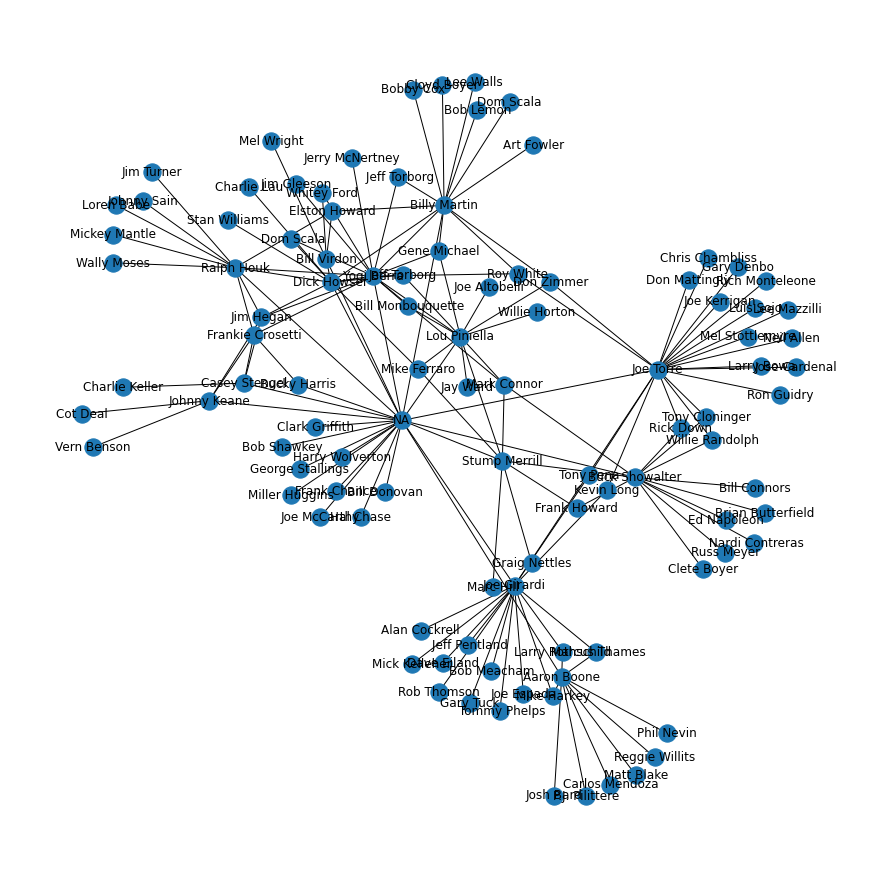

In [25]:
layout = nx.spring_layout(G)
plt.figure(figsize=(12,12)) 
nx.draw(G,layout,with_labels=True)
plt.show()

Time to Start Swapping columns

In [26]:
import numpy as np

In [27]:
ym_array = ym.to_numpy()

In [28]:
#test it worked1
ym.head()

,Field Manager,Bench Coach,First Base Coach,Third Base Coach,Hitting Coach 1,Hitting Coach 2,Pitching Coach 1,Pitching Coach 2,Bullpen Coach 1,Bullpen Coach 2,Bullpen Coach 3
Year,,,,,,,,,,,
2021,Aaron Boone,Carlos Mendoza,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Matt Blake,NaN,Mike Harkey,NaN,NaN
2020,Aaron Boone,Carlos Mendoza,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Matt Blake,NaN,Mike Harkey,NaN,NaN
2019,Aaron Boone,Josh Bard,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Larry Rothschild,NaN,Mike Harkey,NaN,NaN
2018,Aaron Boone,Josh Bard,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Larry Rothschild,NaN,Mike Harkey,NaN,NaN
2017,Joe Girardi,Rob Thomson,Tony Pena,Joe Espada,Alan Cockrell,Marcus Thames,Larry Rothschild,NaN,Mike Harkey,NaN,NaN


In [29]:
#test it worked2
print("Original array:")
print(ym_array)

Original array:
[['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]]


In [30]:
#make the first change:
bench_coach_array = np.copy(ym_array)
bench_coach_array[:,[0, 1]] = bench_coach_array[:,[1, 0]]
print("\nAfter swapping arrays:")
print(bench_coach_array)


After swapping arrays:
[['Carlos Mendoza' 'Aaron Boone' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Carlos Mendoza' 'Aaron Boone' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Josh Bard' 'Aaron Boone' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 [nan 'Clark Griffith' nan ... nan nan nan]
 [nan 'Clark Griffith' nan ... nan nan nan]
 [nan 'Clark Griffith' nan ... nan nan nan]]


In [31]:
print(ym_array)

[['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]]


Iterate

In [32]:
#new array - 1b
first_base_array = np.copy(ym_array)
first_base_array[:,[0, 2]] = first_base_array[:,[2, 0]]
print("\nAfter swapping arrays:")
print(first_base_array)


After swapping arrays:
[['Reggie Willits' 'Carlos Mendoza' 'Aaron Boone' ... 'Mike Harkey' nan
  nan]
 ['Reggie Willits' 'Carlos Mendoza' 'Aaron Boone' ... 'Mike Harkey' nan
  nan]
 ['Reggie Willits' 'Josh Bard' 'Aaron Boone' ... 'Mike Harkey' nan nan]
 ...
 [nan nan 'Clark Griffith' ... nan nan nan]
 [nan nan 'Clark Griffith' ... nan nan nan]
 [nan nan 'Clark Griffith' ... nan nan nan]]


In [33]:
#check old array
print(ym_array)

[['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]]


In [34]:
#new array - 3b
third_base_array = np.copy(ym_array)
third_base_array[:,[0, 3]] = third_base_array[:,[3, 0]]
print("\nAfter swapping arrays:")
print(third_base_array)


After swapping arrays:
[['Phil Nevin' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Phil Nevin' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Phil Nevin' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [35]:
#check old array
print(ym_array)

[['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]]


In [36]:
#new array - hc1
hitting_coach_1_array = np.copy(ym_array)
hitting_coach_1_array[:,[0, 4]] = hitting_coach_1_array[:,[4, 0]]
print("\nAfter swapping arrays:")
print(hitting_coach_1_array)


After swapping arrays:
[['P.J. Pilittere' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey'
  nan nan]
 ['P.J. Pilittere' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey'
  nan nan]
 ['P.J. Pilittere' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [37]:
#check old array
print(ym_array)

[['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]]


In [38]:
#new array - hc2
hitting_coach_2_array = np.copy(ym_array)
hitting_coach_2_array[:,[0, 5]] = hitting_coach_2_array[:,[5, 0]]
print("\nAfter swapping arrays:")
print(hitting_coach_2_array)


After swapping arrays:
[[' Marcus Thames' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey'
  nan nan]
 [' Marcus Thames' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey'
  nan nan]
 [' Marcus Thames' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [39]:
#check old array
print(ym_array)

[['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]]


In [40]:
#new array - pc1
pitching_coach_1_array = np.copy(ym_array)
pitching_coach_1_array[:,[0, 6]] = pitching_coach_1_array[:,[6, 0]]
print("\nAfter swapping arrays:")
print(pitching_coach_1_array)


After swapping arrays:
[['Matt Blake' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Matt Blake' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Larry Rothschild' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [41]:
#check old array
print(ym_array)

[['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]]


In [42]:
#new array - pc2
pitching_coach_2_array = np.copy(ym_array)
pitching_coach_2_array[:,[0, 7]] = pitching_coach_2_array[:,[7, 0]]
print("\nAfter swapping arrays:")
print(pitching_coach_2_array)


After swapping arrays:
[[nan 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 [nan 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 [nan 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [43]:
#check old array
print(ym_array)

[['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]]


In [44]:
#new array - bc1
bullpen_coach_1_array = np.copy(ym_array)
bullpen_coach_1_array[:,[0, 8]] = bullpen_coach_1_array[:,[8, 0]]
print("\nAfter swapping arrays:")
print(bullpen_coach_1_array)


After swapping arrays:
[['Mike Harkey' 'Carlos Mendoza' 'Reggie Willits' ... 'Aaron Boone' nan
  nan]
 ['Mike Harkey' 'Carlos Mendoza' 'Reggie Willits' ... 'Aaron Boone' nan
  nan]
 ['Mike Harkey' 'Josh Bard' 'Reggie Willits' ... 'Aaron Boone' nan nan]
 ...
 [nan nan nan ... 'Clark Griffith' nan nan]
 [nan nan nan ... 'Clark Griffith' nan nan]
 [nan nan nan ... 'Clark Griffith' nan nan]]


In [45]:
#check old array
print(ym_array)

[['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]]


In [46]:
#new array - bc2
bullpen_coach_2_array = np.copy(ym_array)
bullpen_coach_2_array[:,[0, 9]] = bullpen_coach_2_array[:,[9, 0]]
print("\nAfter swapping arrays:")
print(bullpen_coach_2_array)


After swapping arrays:
[[nan 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' 'Aaron Boone'
  nan]
 [nan 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' 'Aaron Boone'
  nan]
 [nan 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' 'Aaron Boone' nan]
 ...
 [nan nan nan ... nan 'Clark Griffith' nan]
 [nan nan nan ... nan 'Clark Griffith' nan]
 [nan nan nan ... nan 'Clark Griffith' nan]]


In [47]:
#check old array
print(ym_array)

[['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]]


In [48]:
#new array - bc3
bullpen_coach_3_array = np.copy(ym_array)
bullpen_coach_3_array[:,[0, 10]] = bullpen_coach_3_array[:,[10, 0]]
print("\nAfter swapping arrays:")
print(bullpen_coach_3_array)


After swapping arrays:
[[nan 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  'Aaron Boone']
 [nan 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  'Aaron Boone']
 [nan 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan 'Aaron Boone']
 ...
 [nan nan nan ... nan nan 'Clark Griffith']
 [nan nan nan ... nan nan 'Clark Griffith']
 [nan nan nan ... nan nan 'Clark Griffith']]


In [49]:
#check old array
print(ym_array)

[['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Carlos Mendoza' 'Reggie Willits' ... 'Mike Harkey' nan
  nan]
 ['Aaron Boone' 'Josh Bard' 'Reggie Willits' ... 'Mike Harkey' nan nan]
 ...
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]
 ['Clark Griffith' nan nan ... nan nan nan]]


Ultimately we will make a giant adjancency list by concatenating the new arrays.  Don't forget to drop any rows with NaN in the first column

In [50]:
total_array = np.concatenate((ym_array,
 bench_coach_array,
 first_base_array,
 third_base_array,
 hitting_coach_1_array,
 hitting_coach_2_array,
 pitching_coach_1_array,
 pitching_coach_2_array,
 bullpen_coach_1_array,
 bullpen_coach_2_array,
 bullpen_coach_3_array),axis = 0)

In [51]:
#test it worked
len(total_array) - (len(ym_array)*11)

0

In [52]:
#convert back to DF
total_df = pd.DataFrame(total_array,
                   columns = list(ym))
total_df.head()

,Field Manager,Bench Coach,First Base Coach,Third Base Coach,Hitting Coach 1,Hitting Coach 2,Pitching Coach 1,Pitching Coach 2,Bullpen Coach 1,Bullpen Coach 2,Bullpen Coach 3
0,Aaron Boone,Carlos Mendoza,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Matt Blake,NaN,Mike Harkey,NaN,NaN
1,Aaron Boone,Carlos Mendoza,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Matt Blake,NaN,Mike Harkey,NaN,NaN
2,Aaron Boone,Josh Bard,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Larry Rothschild,NaN,Mike Harkey,NaN,NaN
3,Aaron Boone,Josh Bard,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Larry Rothschild,NaN,Mike Harkey,NaN,NaN
4,Joe Girardi,Rob Thomson,Tony Pena,Joe Espada,Alan Cockrell,Marcus Thames,Larry Rothschild,NaN,Mike Harkey,NaN,NaN


In [53]:
#don't forget to remove the leading white space!
total_df = total_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
total_df.head()

,Field Manager,Bench Coach,First Base Coach,Third Base Coach,Hitting Coach 1,Hitting Coach 2,Pitching Coach 1,Pitching Coach 2,Bullpen Coach 1,Bullpen Coach 2,Bullpen Coach 3
0,Aaron Boone,Carlos Mendoza,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Matt Blake,NaN,Mike Harkey,NaN,NaN
1,Aaron Boone,Carlos Mendoza,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Matt Blake,NaN,Mike Harkey,NaN,NaN
2,Aaron Boone,Josh Bard,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Larry Rothschild,NaN,Mike Harkey,NaN,NaN
3,Aaron Boone,Josh Bard,Reggie Willits,Phil Nevin,P.J. Pilittere,Marcus Thames,Larry Rothschild,NaN,Mike Harkey,NaN,NaN
4,Joe Girardi,Rob Thomson,Tony Pena,Joe Espada,Alan Cockrell,Marcus Thames,Larry Rothschild,NaN,Mike Harkey,NaN,NaN


In [54]:
#test it worked
len(total_df)-(len(ym_array)*11)

0

In [55]:
#see how many we should be losing
#as a reminder
len(total_df)

1144

In [56]:
total_df.isna().sum()

Field Manager        734
Bench Coach          700
First Base Coach     560
Third Base Coach     390
Hitting Coach 1      630
Hitting Coach 2      970
Pitching Coach 1     530
Pitching Coach 2    1010
Bullpen Coach 1      520
Bullpen Coach 2     1000
Bullpen Coach 3     1030
dtype: int64

In [57]:
#so we should expect
len(total_df) - total_df['Field Manager'].isna().sum()

410

In [58]:
#drop rows that start with NA
total_df = total_df[total_df['Field Manager'].notna()]

In [59]:
len(total_df)

410

Let's convert to a graph

In [60]:
#YOUR DIRECTORY HERE
total_df.to_csv(#YOUR DIRECTORY HERE,
         na_rep = "NA",
        index = False,
         header = False)

In [61]:
#YOUR DIRECTORY HERE
G=nx.read_adjlist(#YOUR DIRECTORY HERE,
             delimiter=",")

list(G.nodes()) #nodes method
#G.nodes() gives a nodeview object, which is like a dict, but not very useful

['Aaron Boone',
 'Carlos Mendoza',
 'Reggie Willits',
 'Phil Nevin',
 'P.J. Pilittere',
 'Marcus Thames',
 'Matt Blake',
 'NA',
 'Mike Harkey',
 'Josh Bard',
 'Larry Rothschild',
 'Joe Girardi',
 'Rob Thomson',
 'Tony Pena',
 'Joe Espada',
 'Alan Cockrell',
 'Jeff Pentland',
 'Gary Tuck',
 'Mick Kelleher',
 'Kevin Long',
 'Dave Eiland',
 'Bob Meacham',
 'Tommy Phelps',
 'Joe Torre',
 'Don Mattingly',
 'Larry Bowa',
 'Ron Guidry',
 'Joe Kerrigan',
 'Lee Mazzilli',
 'Roy White',
 'Luis Sojo',
 'Mel Stottlemyre',
 'Neil Allen',
 'Willie Randolph',
 'Rich Monteleone',
 'Don Zimmer',
 'Rick Down',
 'Gary Denbo',
 'Tony Cloninger',
 'Chris Chambliss',
 'Jose Cardenal',
 'Buck Showalter',
 'Brian Butterfield',
 'Bill Connors',
 'Nardi Contreras',
 'Clete Boyer',
 'Ed Napoleon',
 'Mark Connor',
 'Russ Meyer',
 'Frank Howard',
 'Stump Merrill',
 'Mike Ferraro',
 'Graig Nettles',
 'Marc Hill',
 'Lou Piniella',
 'Jay Ward',
 'Jeff Torborg',
 'Gene Michael',
 'Joe Altobelli',
 'Willie Horton',
 'B

In [62]:
print(nx.info(G))

Graph with 101 nodes and 558 edges


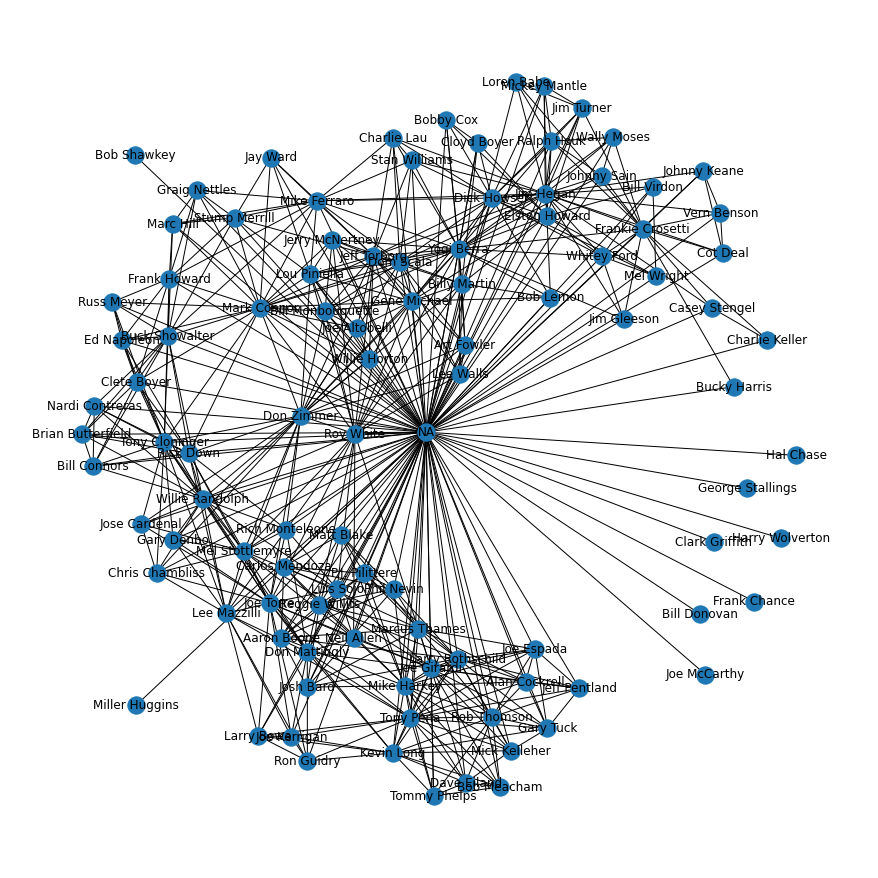

In [63]:
layout = nx.spring_layout(G)
plt.figure(figsize=(12,12)) 
nx.draw(G,layout,with_labels=True)
plt.show()

Get rid of that annoying NA 

In [64]:
#the NA node is not real
G.remove_node("NA")

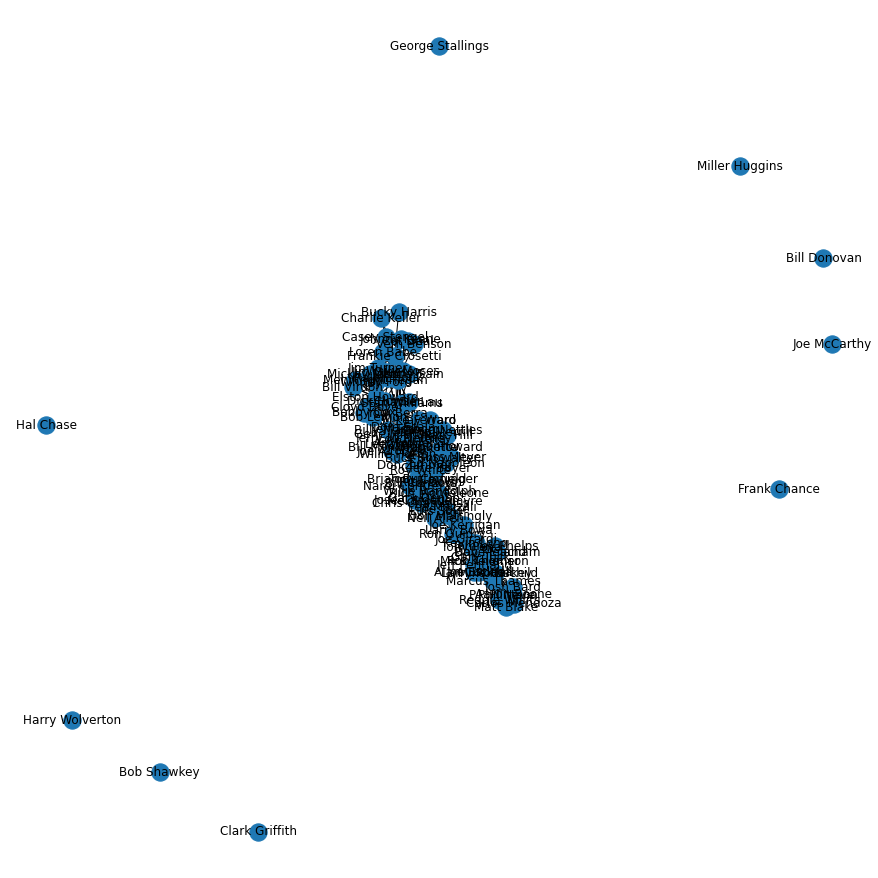

In [65]:
layout = nx.spring_layout(G)
plt.figure(figsize=(12,12)) 
nx.draw(G,layout,with_labels=True)
plt.show()

In [66]:
print(nx.info(G))

Graph with 100 nodes and 458 edges


In [67]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[91, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Stats time

In [68]:
#show to find neighbors, degree
list(G.neighbors('Joe Girardi'))
G.degree['Joe Girardi']

20

In [69]:
sorted(nx.common_neighbors(G, 'Joe Girardi','Marcus Thames'))

['Alan Cockrell',
 'Joe Espada',
 'Larry Rothschild',
 'Mike Harkey',
 'Rob Thomson',
 'Tony Pena']

Build the Random Graph

In [70]:
node_length = len(G.nodes())
node_length

100

In [71]:
#You are using version 2.0 of networkx. Which changed from using a dict for G.degree() to using a dict-like (but not dict) DegreeView. See this guide.
#To have the degrees in a list you can use a list-comprehension:

degrees = [val for (node, val) in G.degree()]
sum(degrees)

916

In [72]:
avg_degree = sum(degrees) / node_length
avg_degree

9.16

In [73]:
#creating p
p = avg_degree / node_length
p

0.0916

In [74]:
#creating a comparable random graph
#n = 100
#p = average degree / number of nodes
g_random = nx.erdos_renyi_graph(node_length,p,seed = 7)

In [75]:
print(nx.info(g_random))

Graph with 100 nodes and 458 edges


Following along here:https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html?highlight=degree%20graph

Build the Yankees Analysis:

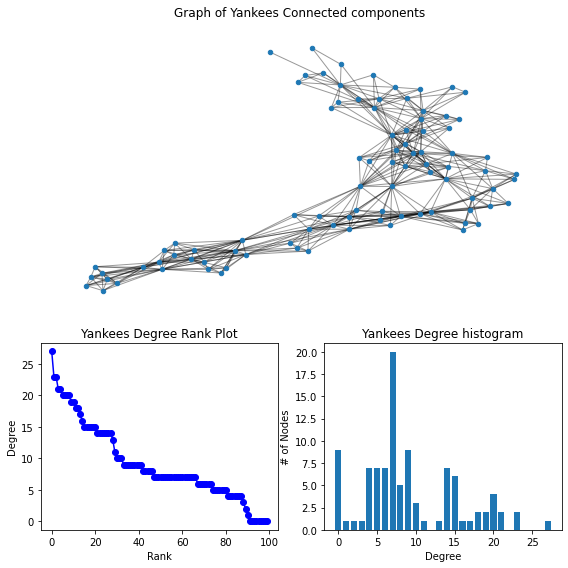

In [76]:
#for Yankees
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) 
dmax = max(degree_sequence) 

fig = plt.figure("Degree of Yankees Graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :]) #first 3 rows, all columns display of this grid we created that is 9 x 9 (0 counts)
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0]) #take just the connected components
#and grab the biggest one, then plot it
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Graph of Yankees Connected components ")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2]) #last 6 rows, all columns up to 2 in this grid
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Yankees Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:]) #last 6 rows, all columns 2 and beyond in this grid
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Yankees Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()


In [77]:
#proof of concept, this is just all connected components, sorting them by length, then the 0 says to grab the biggest one
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
print(nx.info(Gcc))

Graph with 91 nodes and 458 edges


Build the Random Graph Analysis:

In [78]:
print(nx.info(g_random))

Graph with 100 nodes and 458 edges


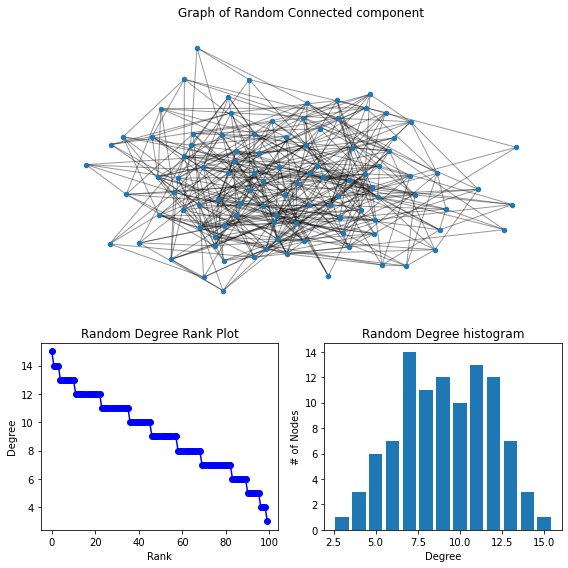

In [79]:
#for Random
degree_sequence = sorted([d for n, d in g_random.degree()], reverse=True) 
dmax = max(degree_sequence) 

fig = plt.figure("Degree of Yankees Graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :]) #first 3 rows, all columns display of this grid we created that is 9 x 9 (0 counts)
Gcc = g_random.subgraph(sorted(nx.connected_components(g_random), key=len, reverse=True)[0]) #take just the connected components
#and grab the biggest one, then plot it
pos = nx.spring_layout(Gcc, seed=7)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Graph of Random Connected component")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2]) #last 6 rows, all columns up to 2 in this grid
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Random Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:]) #last 6 rows, all columns 2 and beyond in this grid
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Random Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()


In [80]:
Gcc = g_random.subgraph(sorted(nx.connected_components(g_random), key=len, reverse=True)[0])
print(nx.info(Gcc))

Graph with 100 nodes and 458 edges


Creating a Test Random Graph for Proof of Concept:

In [81]:
#creating a test random random graph of the largest connected component
#n = 100
#p = average degree / number of nodes
random_test = nx.erdos_renyi_graph(node_length,.01)
print(nx.info(random_test))

Graph with 100 nodes and 51 edges


In [82]:
Gcc = random_test.subgraph(sorted(nx.connected_components(random_test), key=len, reverse=True)[0])
print(nx.info(Gcc))

Graph with 20 nodes and 20 edges


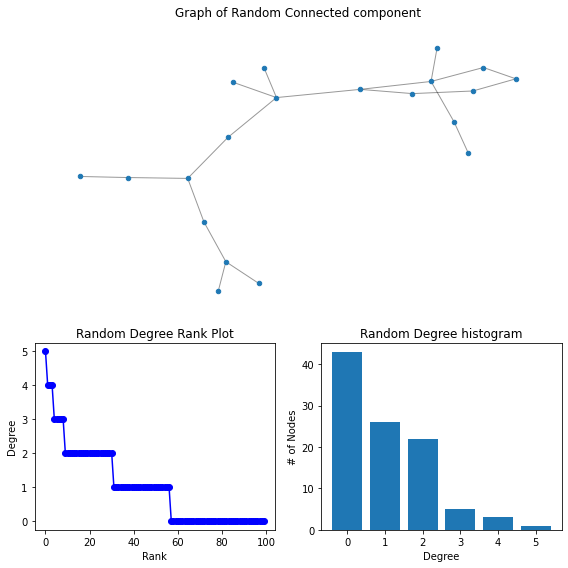

In [83]:
degree_sequence = sorted([d for n, d in random_test.degree()], reverse=True) 
dmax = max(degree_sequence) 

fig = plt.figure("Degree of Yankees Graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :]) #first 3 rows, all columns display of this grid we created that is 9 x 9 (0 counts)
Gcc = random_test.subgraph(sorted(nx.connected_components(random_test), key=len, reverse=True)[0]) #take just the connected components
#and grab the biggest one by using [0], then plot it
pos = nx.spring_layout(Gcc, seed=7)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Graph of Random Connected component")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2]) #last 6 rows, all columns up to 2 in this grid
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Random Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:]) #last 6 rows, all columns 2 and beyond in this grid
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Random Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

Feature and Role Extraction

https://github.com/dkaslovsky/GraphRole
GraphRole provides the RecursiveFeatureExtractor class to automate this process by extracting recursive features capturing local and neighborhood ("regional") structural properties of a given graph.

Node features (e.g., degree) and ego-net features (e.g., neighbors, number of internal vs. external edges) are extracted and then recursively aggregated over each node's neighbors' features until no additional information is encoded.

GraphRole also provides the RoleExtractor class for node role assignment (a form of classification). Different nodes play different structural roles in a graph, and using recursive regional features, these roles can be identified and assigned to collections of nodes. As they are structural in nature, node roles differ from and are often more intuitive than the commonly used communities of nodes. In particular, roles can generalize across graphs whereas the notion of communities cannot
https://github.com/dkaslovsky/GraphRole/blob/master/examples/example.ipynb

https://www.andrew.cmu.edu/user/lakoglu/pubs/ReFeX.pdf
https://web.eecs.umich.edu/~dkoutra/papers/12-kdd-recursiverole.pdf
https://www.youtube.com/watch?v=P-LLLavu3c4&ab_channel=NetworkAnalyticsandSocialComputingLabatUNCC

In [84]:
import warnings
from pprint import pprint
import seaborn as sns

In [85]:
!pip install graphrole
#For general usage, begin by importing the two feature and role extraction classes:
from graphrole import RecursiveFeatureExtractor, RoleExtractor

  Using cached networkx-2.5.1-py3-none-any.whl (1.6 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
netcomp 0.2.3 requires networkx<2, but you have networkx 2.5.1 which is incompatible.


Features are then extracted from a graph G into a pandas.DataFrame:

In [86]:
#with G being previously defined as the Yankees graph...
# extract features
feature_extractor = RecursiveFeatureExtractor(G)
features = feature_extractor.extract_features()

print(f'\nFeatures extracted from {feature_extractor.generation_count} recursive generations:')
print(features)


Features extracted from 2 recursive generations:
                 degree(mean)  degree(sum)  external_edges(mean)  \
Aaron Boone         10.777778         97.0             31.555556   
Alan Cockrell       14.222222        128.0             47.555556   
Art Fowler          18.285714        128.0             89.571429   
Bill Connors        12.571429         88.0             56.714286   
Bill Donovan         0.000000          0.0              0.000000   
...                       ...          ...                   ...   
Wally Moses         15.600000         78.0             58.800000   
Whitey Ford         13.500000        108.0             52.875000   
Willie Horton       16.285714        114.0             82.285714   
Willie Randolph     12.166667        219.0             68.777778   
Yogi Berra          12.000000        324.0             73.518519   

                 internal_edges(mean)  internal_edges(sum)  degree  \
Aaron Boone                 49.777778                448.0     

In [87]:
#extracted as a DF, might be easier to read this way
features
#remember, a lot of columns are about the ego-net i.e. the induced subgraph and the node's neighbors
#stopping rule is simple: no new info
#also remember, this is pruned, not everything is going to be on there

,degree(mean),degree(sum),external_edges(mean),internal_edges(mean),internal_edges(sum),degree,external_edges,internal_edges
Aaron Boone,10.777778,97.0,31.555556,49.777778,448.0,9,24,41
Alan Cockrell,14.222222,128.0,47.555556,69.000000,621.0,9,55,41
Art Fowler,18.285714,128.0,89.571429,92.142857,645.0,7,79,28
Bill Connors,12.571429,88.0,56.714286,55.000000,385.0,7,41,27
Bill Donovan,0.000000,0.0,0.000000,0.000000,0.0,0,0,0
...,...,...,...,...,...,...,...,...
Wally Moses,15.600000,78.0,58.800000,62.200000,311.0,5,53,15
Whitey Ford,13.500000,108.0,52.875000,52.625000,421.0,8,68,24
Willie Horton,16.285714,114.0,82.285714,82.857143,580.0,7,65,28
Willie Randolph,12.166667,219.0,68.777778,54.444444,980.0,18,65,86


How about similarity scores of nodes - take the distance between nodes in the feature space defined by the nodes-feature matrix (~20 min into his video).

In [88]:
from scipy.spatial.distance import pdist, squareform

distances = pdist(features.values, metric='euclidean')
dist_matrix = squareform(distances)

In [89]:
dist_df = pd.DataFrame(dist_matrix,index=features.index, columns = features.index)
dist_df.head()

,Aaron Boone,Alan Cockrell,Art Fowler,Bill Connors,Bill Donovan,Bill Monbouquette,Bill Virdon,Billy Martin,Bob Lemon,Bob Meacham,...,Stump Merrill,Tommy Phelps,Tony Cloninger,Tony Pena,Vern Benson,Wally Moses,Whitey Ford,Willie Horton,Willie Randolph,Yogi Berra
Aaron Boone,0.000000,180.245272,219.510844,72.128015,464.801830,481.306171,290.687412,437.365811,86.522127,66.531575,...,91.679528,66.531575,519.825449,627.474367,310.612284,146.910943,59.548601,152.529114,550.548999,997.480690
Alan Cockrell,180.245272,0.000000,60.352609,240.779167,643.456916,301.993771,466.203711,258.416066,227.430982,126.251844,...,100.090885,126.251844,343.734524,452.525787,487.303062,315.389562,202.869314,59.602536,374.211801,821.571681
Art Fowler,219.510844,60.352609,0.000000,270.438231,675.522549,276.117192,493.817075,234.786029,248.760102,157.693904,...,130.955658,157.693904,325.887289,435.388676,516.433200,341.695286,231.614317,68.994972,355.074625,800.408617
Bill Connors,72.128015,240.779167,270.438231,0.000000,405.989595,540.959184,225.570066,497.024307,43.998339,116.070527,...,142.944874,116.070527,582.275037,691.196163,247.272726,77.028322,49.560498,201.796220,612.788708,1060.396161
Bill Donovan,464.801830,643.456916,675.522549,405.989595,0.000000,944.731922,187.689571,900.314955,430.514529,519.763526,...,547.630541,519.763526,983.189118,1090.651037,162.939406,336.799109,447.120125,606.922952,1013.976631,1460.297872


In [90]:
#what are aaron boone's most similar? 
booney = dist_df.iloc[0]
booney = pd.DataFrame(booney)
booney.head() #remove the 'Aaron Boone' match? 

,Aaron Boone
Aaron Boone,0.000000
Alan Cockrell,180.245272
Art Fowler,219.510844
Bill Connors,72.128015
Bill Donovan,464.801830


In [91]:
booney = booney.sort_values('Aaron Boone', ascending = True)
booney.head(4)

,Aaron Boone
Aaron Boone,0.0
P.J. Pilittere,0.0
Phil Nevin,0.0
Reggie Willits,0.0


Next, these features are used to learn roles. 

The number of roles is automatically determined by a model selection procedure when n_roles=None is passed to the RoleExtractor class instance. Alternatively, n_roles can be set to a desired number of roles to be extracted.

Here I start with an automatic extraction and then move to 7 (to match the number of roles on a modern coaching staff).

In [92]:
# assign node roles by default
role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)

In [93]:
#The role assignment for each node can be retrieved as a dictionary:
node_roles = role_extractor.roles #this is assigning the dictionary
print('\nNode role assignments:')
pprint(node_roles)


Node role assignments:
{'Aaron Boone': 'role_2',
 'Alan Cockrell': 'role_2',
 'Art Fowler': 'role_2',
 'Bill Connors': 'role_4',
 'Bill Donovan': 'role_0',
 'Bill Monbouquette': 'role_2',
 'Bill Virdon': 'role_4',
 'Billy Martin': 'role_2',
 'Bob Lemon': 'role_2',
 'Bob Meacham': 'role_2',
 'Bob Shawkey': 'role_0',
 'Bobby Cox': 'role_4',
 'Brian Butterfield': 'role_4',
 'Buck Showalter': 'role_4',
 'Bucky Harris': 'role_5',
 'Carlos Mendoza': 'role_2',
 'Casey Stengel': 'role_7',
 'Charlie Keller': 'role_5',
 'Charlie Lau': 'role_2',
 'Chris Chambliss': 'role_2',
 'Clark Griffith': 'role_0',
 'Clete Boyer': 'role_7',
 'Cloyd Boyer': 'role_4',
 'Cot Deal': 'role_7',
 'Dave Eiland': 'role_2',
 'Dick Howser': 'role_1',
 'Dom Scala': 'role_2',
 'Don Mattingly': 'role_2',
 'Don Zimmer': 'role_1',
 'Ed Napoleon': 'role_4',
 'Elston Howard': 'role_3',
 'Frank Chance': 'role_0',
 'Frank Howard': 'role_4',
 'Frankie Crosetti': 'role_3',
 'Gary Denbo': 'role_2',
 'Gary Tuck': 'role_2',
 'Gene 

Then, roles can be viewed as a soft assignment and a node's percent membership to each role can be retrieved as a pandas.DataFrame:

In [94]:
node_role_percentages = role_extractor.role_percentage.round(2)
node_role_percentages.head()

,role_0,role_1,role_2,role_3,role_4,role_5,role_6,role_7
Aaron Boone,0.02,0.23,0.45,0.02,0.02,0.02,0.02,0.23
Alan Cockrell,0.01,0.01,0.57,0.01,0.01,0.01,0.01,0.34
Art Fowler,0.01,0.01,0.24,0.12,0.24,0.12,0.12,0.12
Bill Connors,0.02,0.02,0.02,0.02,0.45,0.02,0.23,0.23
Bill Donovan,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12


In [95]:
nodemap = pd.concat([node_role_percentages.mean(), node_role_percentages.std()], axis=1)
print(nodemap.shape)
nodemap.set_axis(['Average Assignment Score', 'Std. Dev of Assignment Score'], axis=1, inplace = True)
nodemap

(8, 2)


,Average Assignment Score,Std. Dev of Assignment Score
role_0,0.0429,0.055035
role_1,0.0974,0.108949
role_2,0.1870,0.191081
role_3,0.1204,0.146900
role_4,0.1595,0.154733
role_5,0.0771,0.107095
role_6,0.0672,0.063803
role_7,0.2402,0.135094


In [96]:
node_role_percentages.sort_values('role_2', ascending=False).iloc[:10 , 2:3]

,role_2
Carlos Mendoza,0.57
Tommy Phelps,0.57
Gary Tuck,0.57
Jeff Pentland,0.57
Mick Kelleher,0.57
Bob Meacham,0.57
Matt Blake,0.57
Dave Eiland,0.57
Joe Espada,0.57
Alan Cockrell,0.57


In [97]:
node_role_percentages.sort_values('role_7', ascending=False).iloc[:10 , 7:8]

,role_7
Jim Gleeson,0.77
Casey Stengel,0.62
Johnny Keane,0.62
Vern Benson,0.62
Cot Deal,0.62
Clete Boyer,0.57
Russ Meyer,0.57
Whitey Ford,0.44
Frank Howard,0.44
Ralph Houk,0.44


In [98]:
role_7 = node_role_percentages.sort_values('role_7', ascending=False).iloc[:10 , 7].index
role_7

Index(['Jim Gleeson', 'Casey Stengel', 'Johnny Keane', 'Vern Benson',
       'Cot Deal', 'Clete Boyer', 'Russ Meyer', 'Whitey Ford', 'Frank Howard',
       'Ralph Houk'],
      dtype='object')

In [99]:
role7graph = G.subgraph(role_7)
list(role7graph.edges())

[('Cot Deal', 'Johnny Keane'),
 ('Cot Deal', 'Vern Benson'),
 ('Frank Howard', 'Russ Meyer'),
 ('Frank Howard', 'Clete Boyer'),
 ('Johnny Keane', 'Vern Benson'),
 ('Whitey Ford', 'Jim Gleeson'),
 ('Clete Boyer', 'Russ Meyer')]

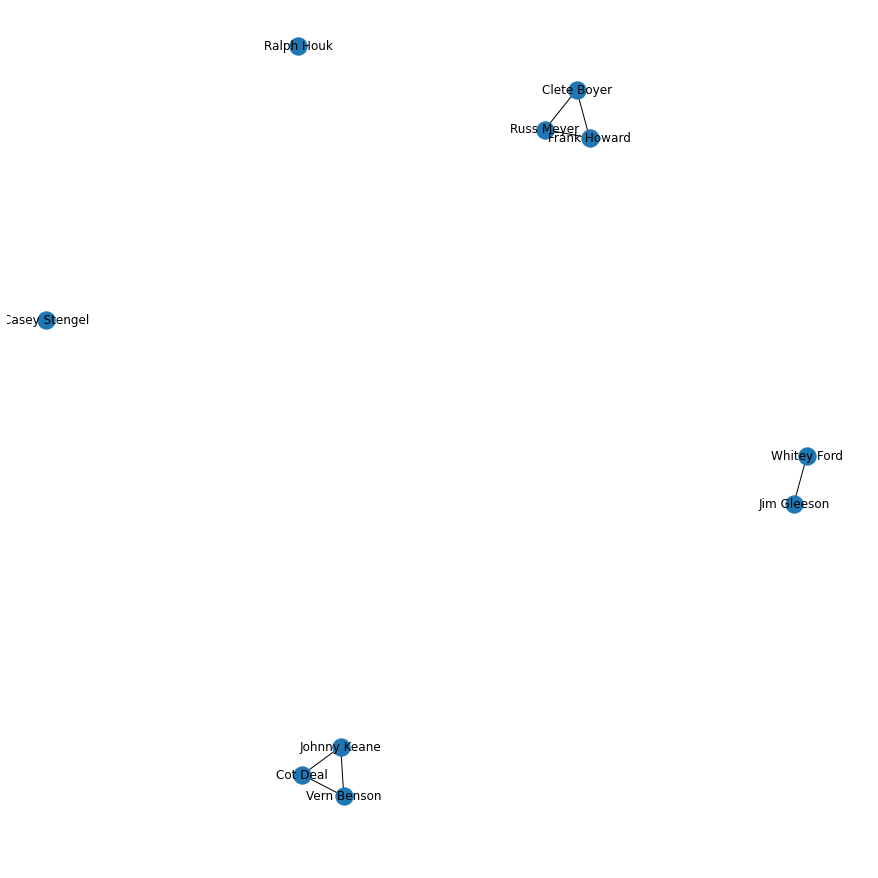

In [100]:
layout = nx.spring_layout(role7graph)
plt.figure(figsize=(12,12)) 
nx.draw(role7graph,layout,with_labels=True)
plt.show()

BREAK

What if we made it artifically tough?

In [101]:
# assign node roles as either / or
role_extractor2 = RoleExtractor(n_roles=2)
role_extractor2.extract_role_factors(features)

Then, roles can be viewed as a soft assignment and a node's percent membership to each role can be retrieved as a pandas.DataFrame:

In [102]:
node_role_percentages2 = role_extractor2.role_percentage.round(2)
node_role_percentages2.head()

,role_0,role_1
Aaron Boone,0.16,0.84
Alan Cockrell,0.90,0.10
Art Fowler,0.84,0.16
Bill Connors,0.82,0.18
Bill Donovan,0.50,0.50


In [103]:
#investigating Joe Girardi
node_role_percentages2[node_role_percentages2.index == 'Joe Girardi']

,role_0,role_1
Joe Girardi,0.21,0.79


In [104]:
node_role_percentages2.sort_values('role_0', ascending=False).iloc[:10 , 0:1]

,role_0
Frankie Crosetti,1.00
Charlie Keller,0.96
Billy Martin,0.96
Bucky Harris,0.96
Elston Howard,0.94
Bill Monbouquette,0.93
Josh Bard,0.91
Alan Cockrell,0.90
Joe Espada,0.90
Carlos Mendoza,0.89


In [105]:
#The role assignment for each node can be retrieved as a dictionary:
node_roles2 = role_extractor2.roles #this is assigning the dictionary
role0 = [k for k,v in node_roles2.items() if v == 'role_0']
len(role0)

70

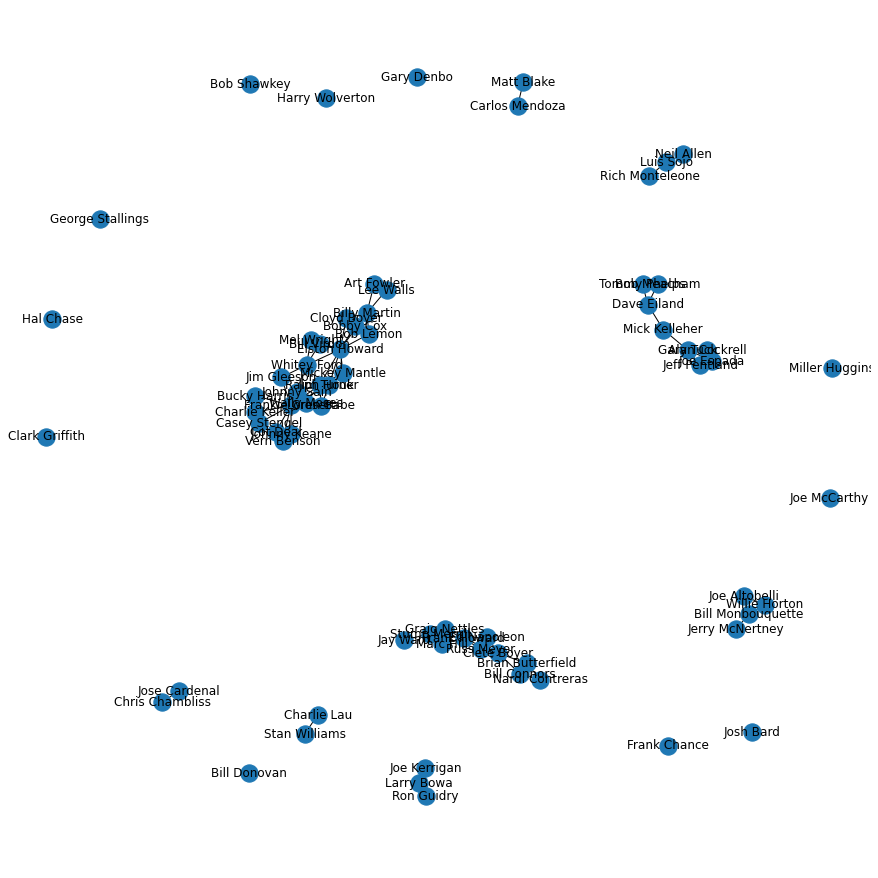

In [106]:
#create the subgraph
role0graph = G.subgraph(role0)
layout = nx.spring_layout(role0graph)
plt.figure(figsize=(12,12)) 
nx.draw(role0graph,layout,with_labels=True)
plt.show()

In [107]:
node_role_percentages2.sort_values('role_1', ascending=False).iloc[:10 , 1:2]

,role_1
Aaron Boone,0.84
Jim Hegan,0.84
Rob Thomson,0.84
Marcus Thames,0.84
Reggie Willits,0.84
Phil Nevin,0.84
P.J. Pilittere,0.84
Buck Showalter,0.82
Mel Stottlemyre,0.81
Mike Ferraro,0.81


In [108]:
#The role assignment for each node can be retrieved as a dictionary:
role1 = [k for k,v in node_roles2.items() if v == 'role_1']
len(role1)

30

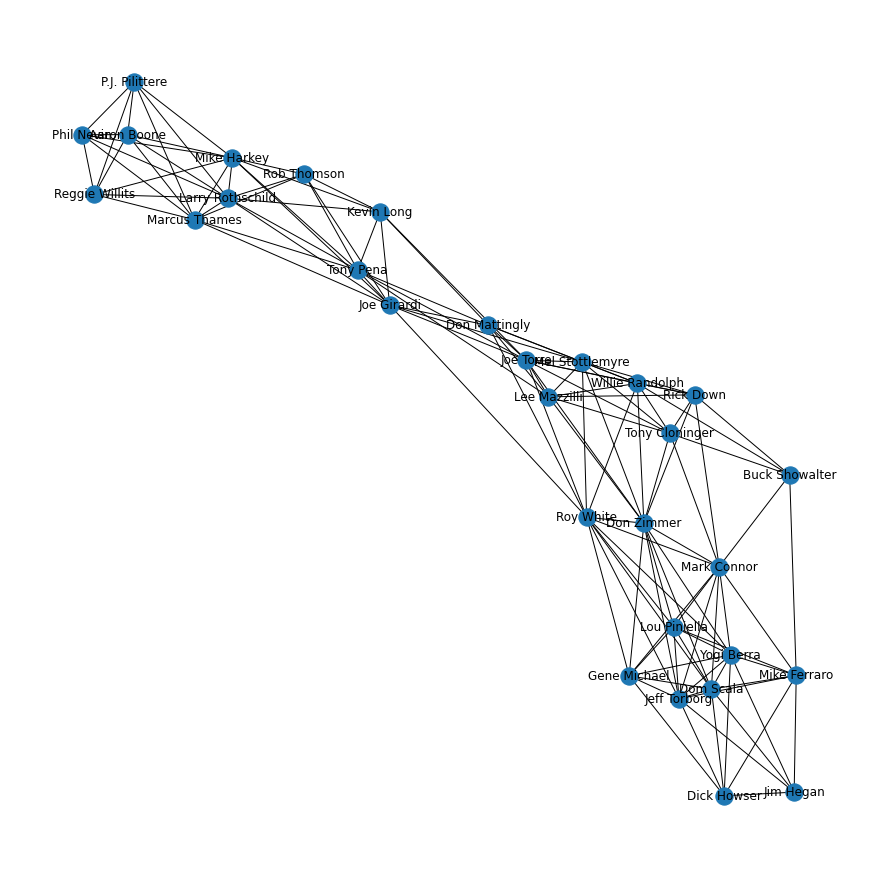

In [109]:
#create the subgraph
role1graph = G.subgraph(role1)
layout = nx.spring_layout(role1graph)
plt.figure(figsize=(12,12)) 
nx.draw(role1graph,layout,with_labels=True)
plt.show()

Comparing average degrees

In [110]:
#average degree, role0
degrees = [val for (node, val) in role0graph.degree()]
sum_of_edges = sum(degrees)
sum_of_edges / role0graph.number_of_nodes()

2.4857142857142858

In [111]:
#average degree, role1
degrees = [val for (node, val) in role1graph.degree()]
sum_of_edges = sum(degrees)
sum_of_edges / role1graph.number_of_nodes()

8.4

Compare features (two syntactical ways to do this, see below for longer way)

In [112]:
features.role0 = features[features.index.isin(role0)]
print(len(features.role0))
features.role0.head()

70


/var/folders/jm/6qh6lc0516l4vv7rrjxcwfzc0000gn/T/ipykernel_99908/2541615217.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  features.role0 = features[features.index.isin(role0)]


,degree(mean),degree(sum),external_edges(mean),internal_edges(mean),internal_edges(sum),degree,external_edges,internal_edges
Alan Cockrell,14.222222,128.0,47.555556,69.000000,621.0,9,55,41
Art Fowler,18.285714,128.0,89.571429,92.142857,645.0,7,79,28
Bill Connors,12.571429,88.0,56.714286,55.000000,385.0,7,41,27
Bill Donovan,0.000000,0.0,0.000000,0.000000,0.0,0,0,0
Bill Monbouquette,16.545455,182.0,84.909091,83.090909,914.0,11,79,57


In [113]:
features.role1 = features[features.index.isin(role1)]
print(len(features.role1))
features.role1.head()

30


/var/folders/jm/6qh6lc0516l4vv7rrjxcwfzc0000gn/T/ipykernel_99908/1328332148.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  features.role1 = features[features.index.isin(role1)]


,degree(mean),degree(sum),external_edges(mean),internal_edges(mean),internal_edges(sum),degree,external_edges,internal_edges
Aaron Boone,10.777778,97.0,31.555556,49.777778,448.0,9,24,41
Buck Showalter,10.800000,162.0,57.200000,45.733333,686.0,15,47,65
Dick Howser,11.052632,210.0,65.526316,46.842105,890.0,19,69,80
Dom Scala,15.176471,258.0,83.352941,71.588235,1217.0,17,91,92
Don Mattingly,13.285714,186.0,67.285714,61.285714,858.0,14,74,63


In [114]:
features_rolecomps = pd.concat([features.role0.mean(), features.role1.mean()], axis=1)
print(features_rolecomps.shape)
features_rolecomps.set_axis(['Role 0 Average Features', 'Role 1 Average Features'], axis=1, inplace = True)
features_rolecomps

(8, 2)


,Role 0 Average Features,Role 1 Average Features
degree(mean),12.301695,12.436254
degree(sum),83.814286,207.033333
external_edges(mean),52.515371,60.530293
internal_edges(mean),54.355297,57.149614
internal_edges(sum),378.014286,949.333333
degree,5.985714,16.566667
external_edges,45.457143,64.600000
internal_edges,22.171429,79.500000
